In [1]:
from tyxe_runfiles import train, eval, generate
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

In [2]:
BASE_DIR = "./tests/pipeline-test"
PROFILE = "sum-10x"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

====== Generating profile sum-10x-10k ======


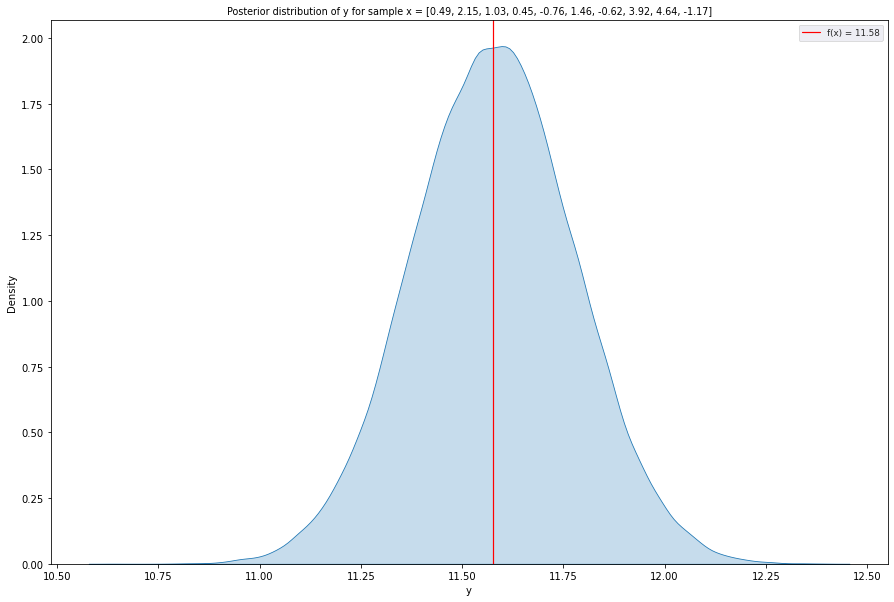

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [7]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    bnn, train_stats = train.train(config, dataset_config, f"{BASE_DIR}")

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
torch.Size([512, 10]) torch.Size([512, 1])
Sequential(
  (0): Linear(in_features=10, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=1, bias=True)
)
train size: 10000
Using device: cpu
===== Training profile sum-10x =====
[0:00:00.158871] epoch: 0 | elbo: 64722151.0 | val_rmse: 14.636862754821777 | val_ll: -1021.3203735351562
[0:00:22.580726] epoch: 100 | elbo: 149746.4875 | val_rmse: 0.7664039134979248 | val_ll: -3.434702157974243
[0:00:43.040524] epoch: 200 | elbo: 49489.9541015625 | val_rmse: 0.48187580704689026 | val_ll: -1.5638772249221802
[0:01:05.016965] epoch: 300 | elbo: 17674.549560546875 | val_rmse: 0.33393773436546326 | val_ll: -0.6500011682510376
[0:01:28.410045] epoch: 400 | elbo: 11025.723193359376 | val_rmse: 0.3004429340362549 | val_ll: -0.5500639081001282
[0:01:50.125417] epoch: 500 | elbo: 9774.36630859375 | val_rmse: 0.29596078395843506 | val_ll: -0.642470538616

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
using device: cpu
====== evaluating profile sum-10x ======
data samples:  (1000, 100)


TypeError: unsupported format string passed to Tensor.__format__

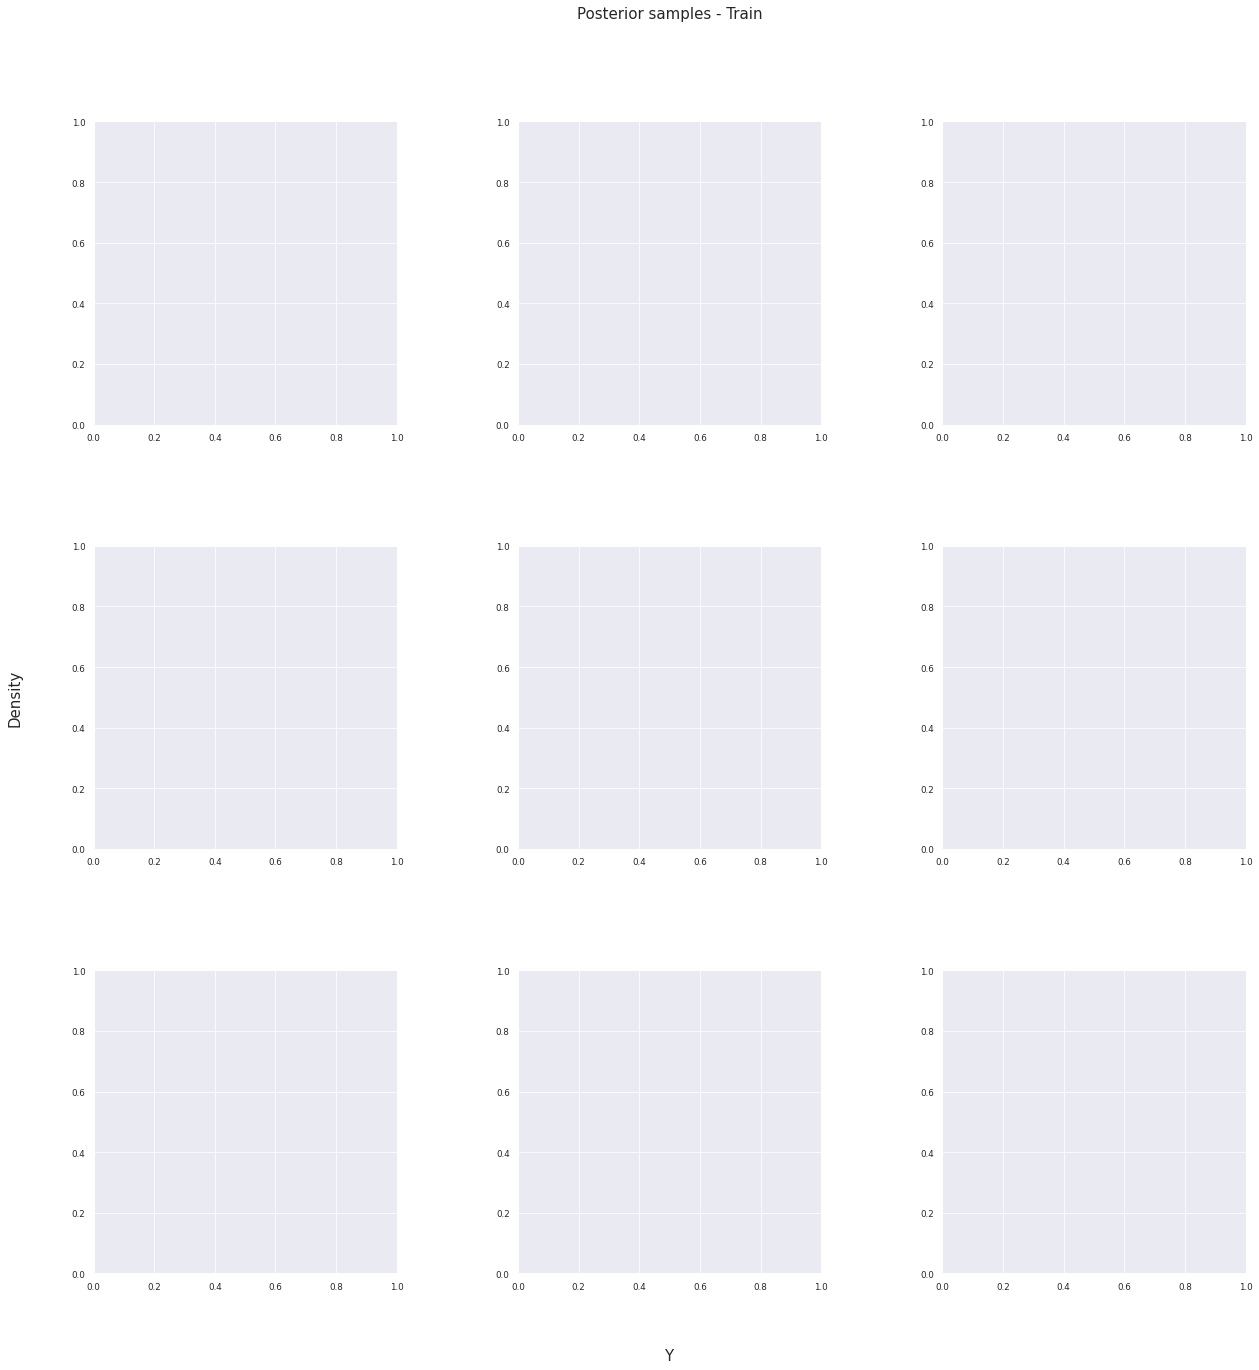

In [8]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval.eval(config, dataset_config, f"{BASE_DIR}", bnn=bnn)